# On the gravitational interaction of plane symmetric clouds of null dust by Tsoubelis & Wang
##  Geoff Cope
##  Univeristy of Utah
##  December 25, 2021 Christmas Day!

https://aip.scitation.org/doi/10.1063/1.529377

In [2]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [3]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [4]:
u,v,x,y,du,dv,dx,dy = symbols( 'u v x y du dv dx dy' ) 

In [12]:
L = Function('L')(u,v)
L

In [6]:
U = Function('U')(u,v)
U

In [13]:
V = Function('V')(u,v)
V

In [7]:
variables = Matrix( [u,v,x,y] )
variables

⎡u⎤
⎢ ⎥
⎢v⎥
⎢ ⎥
⎢x⎥
⎢ ⎥
⎣y⎦

In [8]:
differentials = Matrix( [du,dv,dx,dy] ) 
differentials

⎡du⎤
⎢  ⎥
⎢dv⎥
⎢  ⎥
⎢dx⎥
⎢  ⎥
⎣dy⎦

In [14]:
lineElement = expand(2*exp(-L)*du*dv -exp(-U)*(exp(V)*dx**2 + exp(-V)*dy**2 ))
lineElement

In [15]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡            -L(u, v)                                           ⎤
⎢    0      ℯ                   0                    0          ⎥
⎢                                                               ⎥
⎢ -L(u, v)                                                      ⎥
⎢ℯ              0               0                    0          ⎥
⎢                                                               ⎥
⎢                        -U(u, v)  V(u, v)                      ⎥
⎢    0          0      -ℯ        ⋅ℯ                  0          ⎥
⎢                                                               ⎥
⎢                                             -U(u, v)  -V(u, v)⎥
⎣    0          0               0           -ℯ        ⋅ℯ        ⎦

In [16]:
import sympy

In [17]:
m = sympy.Array(g)
m

⎡            -L(u, v)                                           ⎤
⎢    0      ℯ                   0                    0          ⎥
⎢                                                               ⎥
⎢ -L(u, v)                                                      ⎥
⎢ℯ              0               0                    0          ⎥
⎢                                                               ⎥
⎢                        -U(u, v)  V(u, v)                      ⎥
⎢    0          0      -ℯ        ⋅ℯ                  0          ⎥
⎢                                                               ⎥
⎢                                             -U(u, v)  -V(u, v)⎥
⎣    0          0               0           -ℯ        ⋅ℯ        ⎦

In [18]:
from einsteinpy.symbolic import *

In [19]:
syms = sympy.symbols("u v x y")
u,v,x,y = syms

In [20]:
metric = MetricTensor(m,syms)

In [22]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                                                                                                                    
⎢⎡ ∂                                                                                                                                 
⎢⎢-──(L(u, v))  0                              0                                                           0                         
⎢⎢ ∂u                                                                                                                                
⎢⎢                                                                                                                                   
⎢⎢     0        0                              0                                                           0                         
⎢⎢                                                                                                                                   
⎢⎢                 ⎛  ∂             ∂          ⎞  L(u, v) - U(

In [23]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                             2                               2                                                      
⎢                                ⎛∂          ⎞                   ⎛∂          ⎞            ∂           ∂             ∂           ∂    
⎢                                ⎜──(U(u, v))⎟      2            ⎜──(V(u, v))⎟            ──(U(u, v))⋅──(U(u, v))   ──(V(u, v))⋅──(V(
⎢      ∂           ∂             ⎝∂u         ⎠     ∂             ⎝∂u         ⎠            ∂u          ∂v            ∂u          ∂v   
⎢      ──(L(u, v))⋅──(U(u, v)) - ────────────── + ───(U(u, v)) - ──────────────         - ─────────────────────── - ─────────────────
⎢      ∂u          ∂u                  2            2                  2                             2                         2     
⎢                                                 ∂u                                                                                 
⎢                                                             

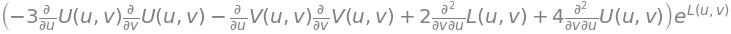

In [24]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [25]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                       2                               2                                                            
⎢                          ⎛∂          ⎞                   ⎛∂          ⎞                                                             
⎢                          ⎜──(U(u, v))⎟      2            ⎜──(V(u, v))⎟                                                  2          
⎢∂           ∂             ⎝∂u         ⎠     ∂             ⎝∂u         ⎠                     ∂           ∂               ∂           
⎢──(L(u, v))⋅──(U(u, v)) - ────────────── + ───(U(u, v)) - ──────────────                1.0⋅──(U(u, v))⋅──(U(u, v)) - ─────(U(u, v))
⎢∂u          ∂u                  2            2                  2                           ∂u          ∂v            ∂v ∂u         
⎢                                           ∂u                                                                                       
⎢                                                             

In [26]:
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡                                                                                                                                    
⎢                                                                                                                                    
⎢                                                                                                                                    
⎢                                                                                                                                    
⎢                                                                                                                                    
⎢                                                                                                                                    
⎢                                                                                                                                    
⎢                                                             

In [27]:
weyl = WeylTensor.from_metric(metric)
weyl.tensor()

⎡                                                                                                                                    
⎢                                                                                                                                    
⎢                                                                                                                                    
⎢                                                                                                                                    
⎢                                                                                                                                    
⎢                                                                                                                                    
⎢                                                                                                                                    
⎢                                                             

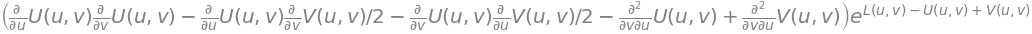

In [29]:
simplify(Ric.tensor())[2,2]